# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
Mars_soup = BeautifulSoup(html, 'html.parser')

In [6]:
# Extract all rows of data
rows = Mars_soup.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [8]:
# Create an empty list to store rows of data
rows_list = []

# Loop through the rows
for row in rows:
    # Extract all cells in the current row
    cells = row.find_all('td')
    # Extract text from each cell
    cell_values = [cell.get_text(strip=True) for cell in cells]
    
    # Only process rows with the expected number of columns (7 in this case)
    if len(cell_values) == 7:
        row_dict = {
            'id': cell_values[0],
            'terrestrial_date': cell_values[1],
            'sol': cell_values[2],
            'ls': cell_values[3],
            'month': cell_values[4],
            'min_temp': cell_values[5],
            'pressure': cell_values[6]
        }
        rows_list.append(row_dict)

In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
df = pd.DataFrame(rows_list, columns=columns)

In [10]:
# Confirm DataFrame was created successfully
print(df.head())

   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [12]:
# Change data types for data analysis
# Convert data types
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int) 
df['ls'] = df['ls'].astype(int)  
df['month'] = df['month'].astype(int)  
df['min_temp'] = df['min_temp'].astype(float)  
df['pressure'] = df['pressure'].astype(float)  


In [13]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [14]:
# 1. How many months are there on Mars?
mars_months = df['month'].nunique()
print(mars_months)

12


In [15]:
# 2. How many sols (Martian days) worth of data are there?
total_sols = df['sol'].nunique()
print(total_sols)

1867


In [17]:
# 3. What is the average minimum temperature by month?
avg_min_temp = df.groupby('month')['min_temp'].mean()
print(avg_min_temp)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


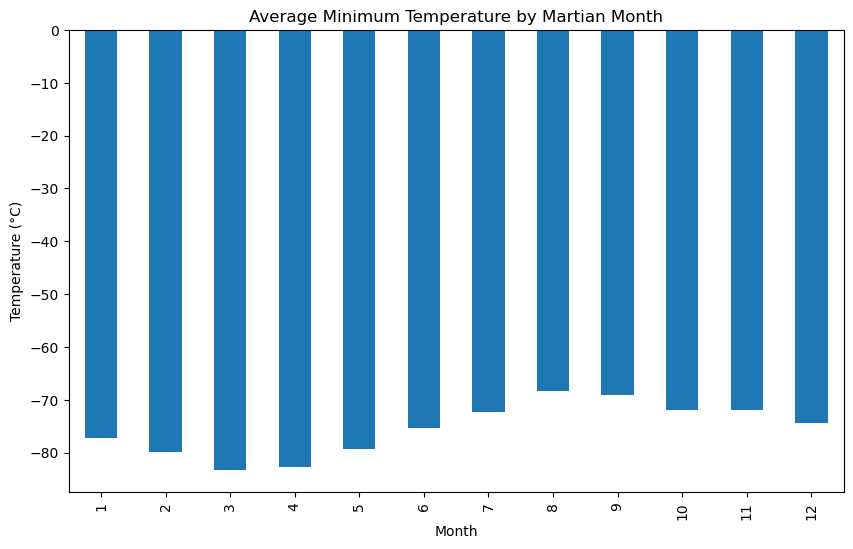

In [18]:
# Plot the average minimum temperature by month
avg_min_temp.plot(kind='bar', figsize=(10, 6), title='Average Minimum Temperature by Martian Month')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.show()

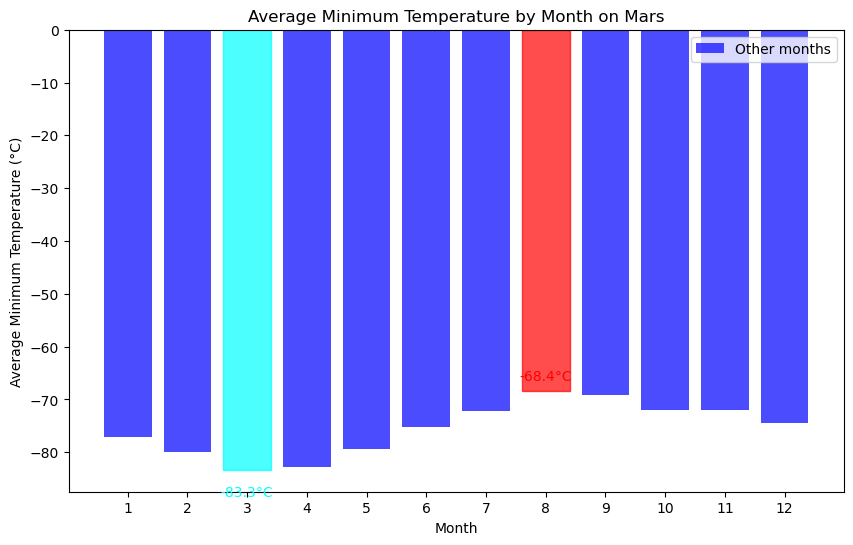

In [19]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
coldest_month = avg_min_temp.idxmin()
hottest_month = avg_min_temp.idxmax()

# Plot the average minimum temperature by month
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_min_temp.index, avg_min_temp, color='blue', alpha=0.7)

# Highlight the coldest and hottest months
bars[coldest_month - 1].set_color('cyan')  # Coldest month (adjust index for 0-based)
bars[hottest_month - 1].set_color('red')   # Hottest month (adjust index for 0-based)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.title('Average Minimum Temperature by Month on Mars')
plt.xticks(avg_min_temp.index)
plt.legend(['Other months', 'Coldest month', 'Hottest month'], loc='upper right')

# Annotate coldest and hottest temperatures
plt.text(coldest_month, avg_min_temp[coldest_month] - 5,
         f"{avg_min_temp[coldest_month]:.1f}°C", color='cyan', ha='center')
plt.text(hottest_month, avg_min_temp[hottest_month] + 2,
         f"{avg_min_temp[hottest_month]:.1f}°C", color='red', ha='center')

# Show plot
plt.show()

In [21]:
# 4. What is the average pressure by month?
avg_pressure = df.groupby('month')['pressure'].mean()
print(avg_pressure)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


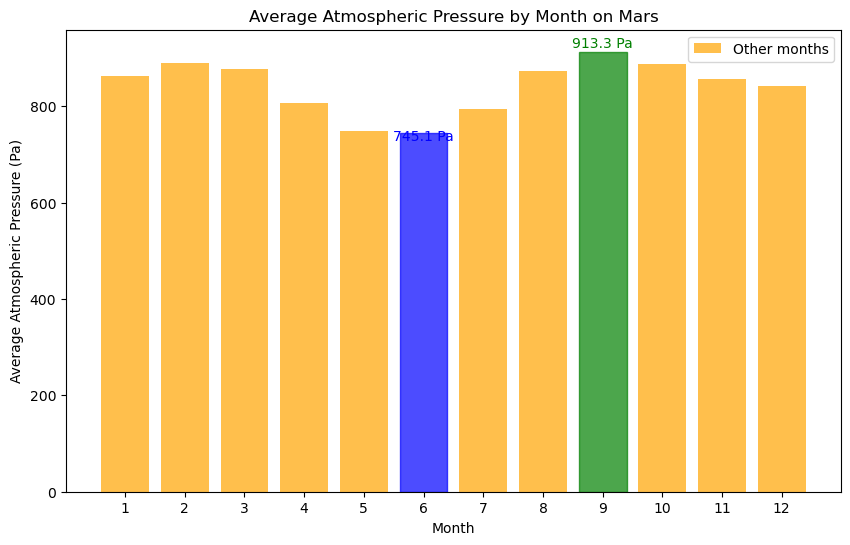

In [22]:
# Plot the average pressure by month
# Find the months with the lowest and highest pressure
lowest_pressure_month = avg_pressure.idxmin()
highest_pressure_month = avg_pressure.idxmax()

# Plot the average atmospheric pressure by month
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_pressure.index, avg_pressure, color='orange', alpha=0.7)

# Highlight the lowest and highest pressure months
bars[lowest_pressure_month - 1].set_color('blue')  # Lowest pressure (adjust index for 0-based)
bars[highest_pressure_month - 1].set_color('green')  # Highest pressure (adjust index for 0-based)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure (Pa)')
plt.title('Average Atmospheric Pressure by Month on Mars')
plt.xticks(avg_pressure.index)
plt.legend(['Other months', 'Lowest pressure month', 'Highest pressure month'], loc='upper right')

# Annotate lowest and highest pressure values
plt.text(lowest_pressure_month, avg_pressure[lowest_pressure_month] - 15,
         f"{avg_pressure[lowest_pressure_month]:.1f} Pa", color='blue', ha='center')
plt.text(highest_pressure_month, avg_pressure[highest_pressure_month] + 10,
         f"{avg_pressure[highest_pressure_month]:.1f} Pa", color='green', ha='center')

# Show plot
plt.show()


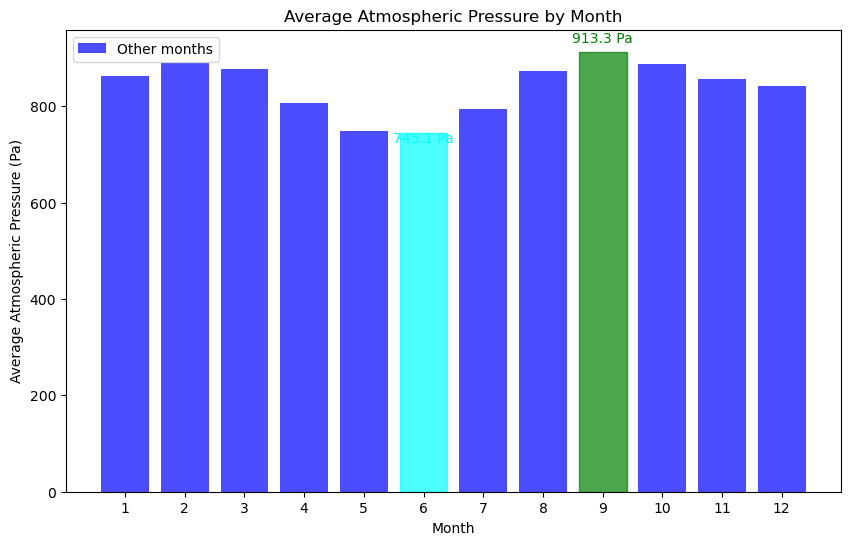

In [23]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# Find the months with the lowest and highest pressure
lowest_pressure_month = avg_pressure.idxmin()
highest_pressure_month = avg_pressure.idxmax()

# Plot the average atmospheric pressure by month
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_pressure.index, avg_pressure, color='blue', alpha=0.7)

# Highlight the lowest and highest pressure months
bars[lowest_pressure_month - 1].set_color('cyan')  # Lowest pressure
bars[highest_pressure_month - 1].set_color('green')  # Highest pressure

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure (Pa)')
plt.title('Average Atmospheric Pressure by Month')
plt.xticks(avg_pressure.index)
plt.legend(['Other months', 'Lowest pressure month', 'Highest pressure month'], loc='upper left')

# Annotate lowest and highest pressure values
plt.text(lowest_pressure_month, avg_pressure[lowest_pressure_month] - 20,
         f"{avg_pressure[lowest_pressure_month]:.1f} Pa", color='cyan', ha='center')
plt.text(highest_pressure_month, avg_pressure[highest_pressure_month] + 20,
         f"{avg_pressure[highest_pressure_month]:.1f} Pa", color='green', ha='center')

# Show plot
plt.show()


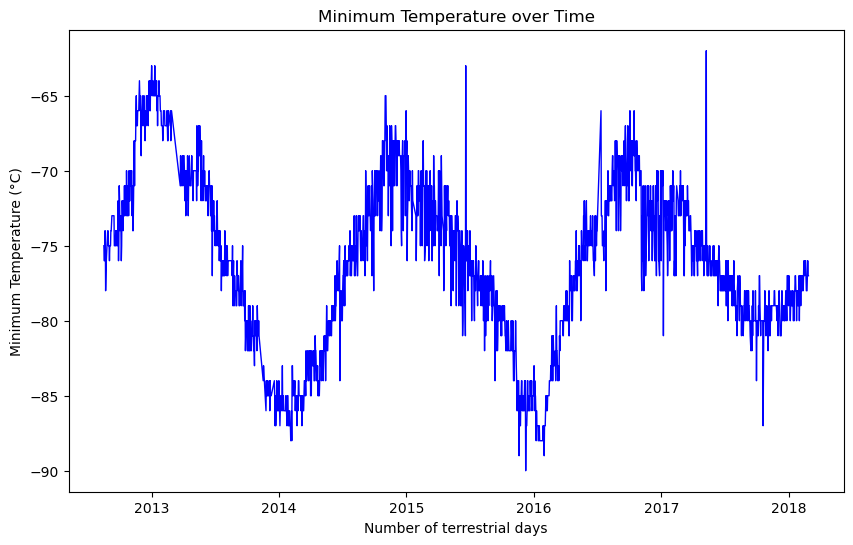

In [24]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
# Plot the daily minimum temperature over time
plt.figure(figsize=(10, 6))
plt.plot(df['terrestrial_date'], df['min_temp'], color='blue', linewidth=1)

# Add labels and title
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum Temperature (°C)')
plt.title('Minimum Temperature over Time')

# Show plot
plt.show()


#### Minimum Temperature

Observation: The coldest months on Mars show average minimum temperatures around -83°C, while the warmest months reach closer to -68°C. These trends align with seasonal changes on Mars, with colder temperatures during the Martian winter and slightly warmer temperatures during summer.
Insight: Martian temperatures remain far below freezing, highlighting the planet’s extreme cold. The temperature variation indicates the presence of distinct seasons similar to Earth, though more extreme.

#### Atmospheric Pressure

Observation: The atmospheric pressure on Mars is highest during the colder months (around 900 Pa) and lowest during the warmer months (around 740 Pa). This is likely due to the seasonal sublimation and deposition of carbon dioxide from the polar ice caps, which affects atmospheric density.
Insight: Mars experiences significant fluctuations in atmospheric pressure across its seasons, demonstrating the impact of temperature on atmospheric composition and density.

#### Year Length

Observation: The Martian year was estimated based on the observed cyclic pattern in the minimum temperatures. The data suggests that a Martian year spans approximately 687 Earth days, corresponding to the time it takes for Mars to complete one orbit around the Sun.
Insight: This confirms the expected Martian orbital period and reinforces the cyclic patterns in temperature and atmospheric pressure as part of the Martian climate system.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [25]:
# Write the data to a CSV
df.to_csv('mars_weather_data.csv', index=False)
print("Data has been successfully saved to 'mars_weather_data.csv'.")

Data has been successfully saved to 'mars_weather_data.csv'.


In [22]:
browser.quit()